In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import gmaps.geojson_geometries
import gmaps.datasets

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Google developer API key
#from config import gkey

## Configure gmaps
# gmaps.configure(api_key=gkey)


In [8]:
# # df_by_state =  pd.read_csv('OutputFiles/total_count_by_state.csv')
# df_gun = pd.read_csv('DataFiles/gunlaw_scorecard_2018.csv')
# df_gun.rename(columns={'STATE': 'State', 'GUN LAW STRENGTH (RANKED)': 'Ranked'}, inplace=True)

In [4]:
# df_gun_ranked = df_gun.sort_values(by=['Ranked'])
# # df_gun_ranked
# ## Starting from 'Ranked': 21 and so, gunlaw grades will be D+ or worse

In [5]:
unique_gunlaw_grades = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']

### 2014

In [9]:
df_gun_score_2014 = pd.read_csv('DataFiles/gunlaw_scorecard_2014.csv')
df_gun_score_2014.rename(columns={'STATE': 'State', 'GUN LAW STRENGTH (RANKED)': 'Ranked'}, inplace=True)

In [10]:
df_2014 = pd.read_csv('OutputFiles/Tina/combined_2014.csv')
df_2014.drop('State', axis=1, inplace=True)
df_2014.rename(columns={'States': 'State'}, inplace=True)
df_2014['Incident per capita'] = df_2014['Mass Shooting Count']/df_2014['Population']
df_2014.loc[:,'Per Capita Mass Shooting'] *= 10**6
df_2014.loc[:,'Incident per capita'] *= 10**6


df_2014_gun = pd.merge(df_2014, df_gun_score_2014, how = 'inner', on = 'State')
df_2014_gun = df_2014_gun.sort_values(by= ['Ranked'])
# df_2014_gun

In [11]:
df_2014_gun.shape

(50, 22)

In [12]:
#Check states that have 'Incident per capita' >= 2 and Gunlaw grade is better than D+

# df_2014_gun.loc[(df_2014_gun['Incident per capita'] >= 2) & (df_2014_gun['Ranked'] < 21)]
df_2014_gun.loc[(df_2014_gun['Incident per capita'] >= 2) & (df_2014_gun['Ranked'] < 21), ['State', '2014 GRADE', 'Incident per capita']]

,State,2014 GRADE,Incident per capita
12,Illinois,B+,2.020399


#### 2014 Grades

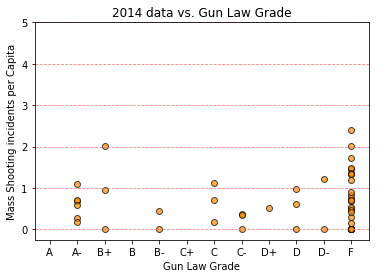

In [14]:
## Plot dummies to workaround the unexpected x-axis issues
dummy_x = unique_gunlaw_grades
dummy_y = [-1]*len(unique_gunlaw_grades)
plt.scatter(dummy_x, dummy_y)

# Start plotting
plt.scatter(df_2014_gun['2014 GRADE'], df_2014_gun['Incident per capita'], color = 'darkorange', edgecolors = 'black', alpha = .7)
ax = plt.gca()
ax.yaxis.grid(which='major', color = 'lightcoral', linestyle='--')
plt.ylim(-0.25, 5)

plt.title(f"2014 data vs. Gun Law Grade")
plt.xlabel("Gun Law Grade")
plt.ylabel("Mass Shooting incidents per Capita")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_2014.png', bbox_inches = "tight")
plt.show()

#### 2014 Ranked

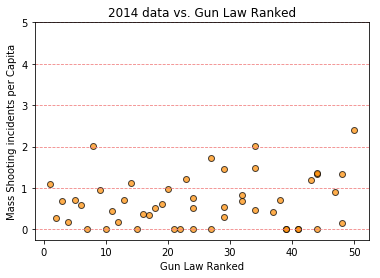

In [15]:
# Start plotting
plt.scatter(df_2014_gun['Ranked'], df_2014_gun['Incident per capita'], color = 'darkorange', edgecolors = 'black', alpha = .7)
ax = plt.gca()
ax.yaxis.grid(which='major', color = 'lightcoral', linestyle='--')
plt.ylim(-0.25, 5)

plt.title(f"2014 data vs. Gun Law Ranked")
plt.xlabel("Gun Law Ranked")
plt.ylabel("Mass Shooting incidents per Capita")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_2014_ranked.png', bbox_inches = "tight")
plt.show()

### 2015

In [16]:
df_gun_score_2015 = pd.read_csv('DataFiles/gunlaw_scorecard_2015.csv')
df_gun_score_2015.rename(columns={'STATE': 'State', 'GUN LAW STRENGTH (RANKED)': 'Ranked'}, inplace=True)

In [17]:
df_2015 = pd.read_csv('OutputFiles/Tina/combined_2015.csv')
df_2015.drop('State', axis=1, inplace=True)
df_2015.rename(columns={'States': 'State'}, inplace=True)
df_2015['Incident per capita'] = df_2015['Mass Shooting Count']/df_2015['Population']
df_2015.loc[:,'Per Capita Mass Shooting'] *= 10**6
df_2015.loc[:,'Incident per capita'] *= 10**6


df_2015_gun = pd.merge(df_2015, df_gun_score_2015, how = 'inner', on = 'State')
df_2015_gun = df_2015_gun.sort_values(by= ['Ranked'])
# df_2015_gun.head()

In [18]:
df_2015_gun.shape

(50, 22)

In [19]:
#Check states that have 'Incident per capita' >= 2 and Gunlaw grade is better than D+

# df_2015_gun.loc[(df_2015_gun['Incident per capita'] >= 2) & (df_2015_gun['Ranked'] < 21)]
df_2015_gun.loc[(df_2015_gun['Incident per capita'] >= 2) & (df_2015_gun['Ranked'] < 21), ['State', '2015 GRADE', 'Incident per capita']]

,State,2015 GRADE,Incident per capita
19,Maryland,A-,2.192044


#### 2015 Grades

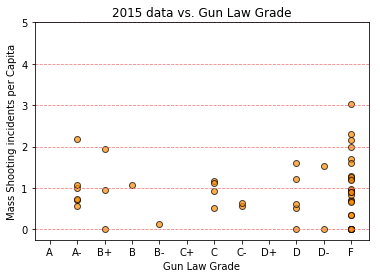

In [21]:
## Plot dummies to workaround the unexpected x-axis issues
dummy_x = unique_gunlaw_grades
dummy_y = [-1]*len(unique_gunlaw_grades)
plt.scatter(dummy_x, dummy_y)

# Start plotting
plt.scatter(df_2015_gun['2015 GRADE'], df_2015_gun['Incident per capita'], color = 'darkorange', edgecolors = 'black', alpha = .7)
ax = plt.gca()
ax.yaxis.grid(which='major', color = 'lightcoral', linestyle='--')
plt.ylim(-0.25, 5)

plt.title(f"2015 data vs. Gun Law Grade")
plt.xlabel("Gun Law Grade")
plt.ylabel("Mass Shooting incidents per Capita")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_2015.png', bbox_inches = "tight")
plt.show()

#### 2015 Ranked

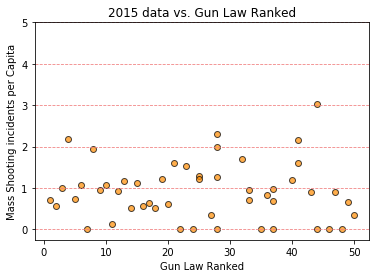

In [22]:
# Start plotting
plt.scatter(df_2015_gun['Ranked'], df_2015_gun['Incident per capita'], color = 'darkorange', edgecolors = 'black', alpha = .7)
ax = plt.gca()
ax.yaxis.grid(which='major', color = 'lightcoral', linestyle='--')
plt.ylim(-0.25, 5)

plt.title(f"2015 data vs. Gun Law Ranked")
plt.xlabel("Gun Law Ranked")
plt.ylabel("Mass Shooting incidents per Capita")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_2015_ranked.png', bbox_inches = "tight")
plt.show()

### 2016

In [23]:
df_gun_score_2016 = pd.read_csv('DataFiles/gunlaw_scorecard_2016.csv')
df_gun_score_2016.rename(columns={'STATE': 'State', 'GUN LAW STRENGTH (RANKED)': 'Ranked'}, inplace=True)

In [24]:
df_2016 = pd.read_csv('OutputFiles/Tina/combined_2016.csv')
df_2016.drop('State', axis=1, inplace=True)
df_2016.rename(columns={'States': 'State'}, inplace=True)
df_2016['Incident per capita'] = df_2016['Mass Shooting Count']/df_2016['Population']
df_2016.loc[:,'Per Capita Mass Shooting'] *= 10**6
df_2016.loc[:,'Incident per capita'] *= 10**6


df_2016_gun = pd.merge(df_2016, df_gun_score_2016, how = 'inner', on = 'State')
df_2016_gun = df_2016_gun.sort_values(by= ['Ranked'])
# df_2016_gun.head()

In [25]:
df_2016_gun.shape

(50, 22)

In [26]:
#Check states that have 'Incident per capita' >= 2 and Gunlaw grade is better than D+

# df_2016_gun.loc[(df_2016_gun['Incident per capita'] >= 2) & (df_2016_gun['Ranked'] < 21)]
df_2016_gun.loc[(df_2016_gun['Incident per capita'] >= 2) & (df_2016_gun['Ranked'] < 21), ['State', '2016 GRADE', 'Incident per capita']]

,State,2016 GRADE,Incident per capita
12,Illinois,B+,3.268054
7,Delaware,B,2.139735


#### 2016 Grades

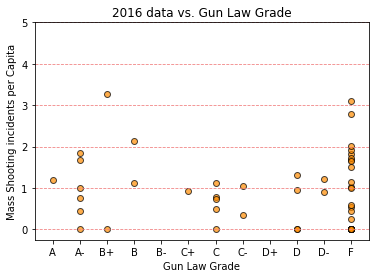

In [27]:
## Plot dummies to workaround the unexpected x-axis issues
dummy_x = unique_gunlaw_grades
dummy_y = [-1]*len(unique_gunlaw_grades)
plt.scatter(dummy_x, dummy_y)

# Start plotting
plt.scatter(df_2016_gun['2016 GRADE'], df_2016_gun['Incident per capita'], color = 'darkorange', edgecolors = 'black', alpha = .7)
ax = plt.gca()
ax.yaxis.grid(which='major', color = 'lightcoral', linestyle='--')
plt.ylim(-0.25, 5)

plt.title(f"2016 data vs. Gun Law Grade")
plt.xlabel("Gun Law Grade")
plt.ylabel("Mass Shooting incidents per Capita")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_2016.png', bbox_inches = "tight")
plt.show()

#### 2016 Ranked

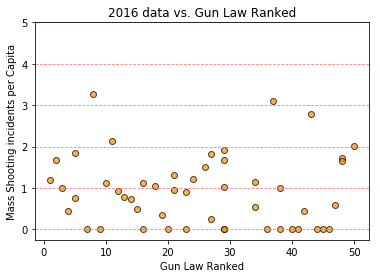

In [28]:
# Start plotting
plt.scatter(df_2016_gun['Ranked'], df_2016_gun['Incident per capita'], color = 'darkorange', edgecolors = 'black', alpha = .7)
ax = plt.gca()
ax.yaxis.grid(which='major', color = 'lightcoral', linestyle='--')
plt.ylim(-0.25, 5)

plt.title(f"2016 data vs. Gun Law Ranked")
plt.xlabel("Gun Law Ranked")
plt.ylabel("Mass Shooting incidents per Capita")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_2016_ranked.png', bbox_inches = "tight")
plt.show()

### 2017

In [29]:
df_gun_score_2017 = pd.read_csv('DataFiles/gunlaw_scorecard_2017.csv')
df_gun_score_2017.rename(columns={'STATE': 'State', 'GUN LAW STRENGTH (RANKED)': 'Ranked'}, inplace=True)

In [30]:
df_2017 = pd.read_csv('OutputFiles/Tina/combined_2017.csv')
df_2017.drop('State', axis=1, inplace=True)
df_2017.rename(columns={'States': 'State'}, inplace=True)
df_2017['Incident per capita'] = df_2017['Mass Shooting Count']/df_2017['Population']
df_2017.loc[:,'Per Capita Mass Shooting'] *= 10**6
df_2017.loc[:,'Incident per capita'] *= 10**6


df_2017_gun = pd.merge(df_2017, df_gun_score_2017, how = 'inner', on = 'State')
df_2017_gun = df_2017_gun.sort_values(by= ['Ranked'])
# df_2017_gun.head()

In [31]:
df_2017_gun.shape

(50, 22)

In [32]:
#Check states that have 'Incident per capita' >= 2 and Gunlaw grade is better than D+
# df_2017_gun.loc[(df_2017_gun['Incident per capita'] >= 2) & (df_2017_gun['Ranked'] < 21)]

df_2017_gun.loc[(df_2017_gun['Incident per capita'] >= 2) & (df_2017_gun['Ranked'] < 21), ['State', '2017 GRADE', 'Incident per capita']]

,State,2017 GRADE,Incident per capita
12,Illinois,B+,2.80057


#### 2017 Grades

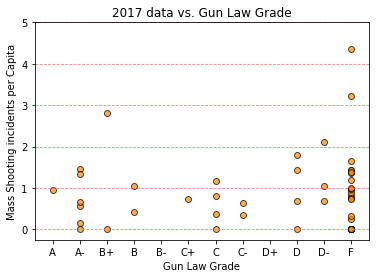

In [33]:
## Plot dummies to workaround the unexpected x-axis issues
dummy_x = unique_gunlaw_grades
dummy_y = [-1]*len(unique_gunlaw_grades)
plt.scatter(dummy_x, dummy_y)

# Start plotting
plt.scatter(df_2017_gun['2017 GRADE'], df_2017_gun['Incident per capita'], color = 'darkorange', edgecolors = 'black', alpha = .7)
ax = plt.gca()
ax.yaxis.grid(which='major', color = 'lightcoral', linestyle='--')
plt.ylim(-0.25, 5)

plt.title(f"2017 data vs. Gun Law Grade")
plt.xlabel("Gun Law Grade")
plt.ylabel("Mass Shooting incidents per Capita")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_2017.png', bbox_inches = "tight")
plt.show()

#### 2017 Ranked

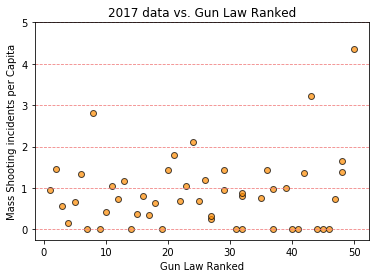

In [34]:
# Start plotting
plt.scatter(df_2017_gun['Ranked'], df_2017_gun['Incident per capita'], color = 'darkorange', edgecolors = 'black', alpha = .7)
ax = plt.gca()
ax.yaxis.grid(which='major', color = 'lightcoral', linestyle='--')
plt.ylim(-0.25, 5)

plt.title(f"2017 data vs. Gun Law Ranked")
plt.xlabel("Gun Law Ranked")
plt.ylabel("Mass Shooting incidents per Capita")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_2017_ranked.png', bbox_inches = "tight")
plt.show()

### (2014 - 2017) Gunlaw grade vs Mass Shooting Incidents per capita **by State

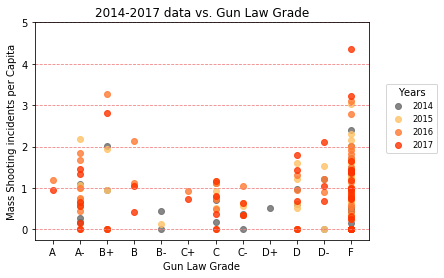

In [37]:
## Plot dummies to workaround the unexpected x-axis issues
dummy_x = unique_gunlaw_grades
dummy_y = [-1]*len(unique_gunlaw_grades)
plt.scatter(dummy_x, dummy_y)

# Start plotting
plt.scatter(df_2014_gun['2014 GRADE'], df_2014_gun['Incident per capita'], color = 'dimgrey', alpha = .8, label = '2014')
plt.scatter(df_2015_gun['2015 GRADE'], df_2015_gun['Incident per capita'], color = str('#ffc266'), alpha = .8, label = '2015')
plt.scatter(df_2016_gun['2016 GRADE'], df_2016_gun['Incident per capita'], color = str('#ff7a33'), alpha = .8, label = '2016')
plt.scatter(df_2017_gun['2017 GRADE'], df_2017_gun['Incident per capita'], color = str('#ff3300'), alpha = .8, label = '2017')


ax = plt.gca()
ax.yaxis.grid(which='major', color = 'lightcoral', linestyle='--')

# xtick_gunlaw_grades = ['A', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
# plt.xticks(xtick_gunlaw_grades)

plt.ylim(-0.25, 5)

plt.title(f"2014-2017 data vs. Gun Law Grade")
plt.xlabel("Gun Law Grade")
plt.ylabel("Mass Shooting incidents per Capita")

lgnd = plt.legend(loc = (1.05, 0.40), fontsize = 'small', title = "Years")
## As below, loc for having note on the right-hand side of the chart
# lgnd = plt.legend(loc = (1.05, 0.75), fontsize = 'small', title = "Years")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_all.png', bbox_inches = "tight")
plt.show()

### (2014 - 2017) Gunlaw ranked vs Mass Shooting Incidents per capita **by State

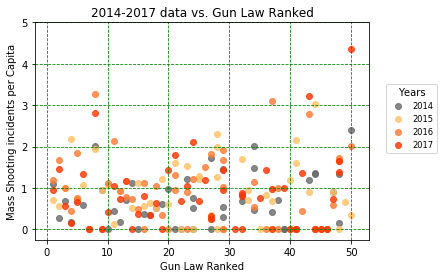

In [38]:
plt.scatter(df_2014_gun['Ranked'], df_2014_gun['Incident per capita'], color = 'dimgrey', alpha = .8, label = '2014')
plt.scatter(df_2015_gun['Ranked'], df_2015_gun['Incident per capita'], color = str('#ffc266'), alpha = .8, label = '2015')
plt.scatter(df_2016_gun['Ranked'], df_2016_gun['Incident per capita'], color = str('#ff7a33'), alpha = .8, label = '2016')
plt.scatter(df_2017_gun['Ranked'], df_2017_gun['Incident per capita'], color = str('#ff3300'), alpha = .8, label = '2017')


ax = plt.gca()
ax.yaxis.grid(which='major', color = 'green', linestyle='--')
ax.xaxis.grid(which='major', color = 'green', linestyle='--')

# xtick_gunlaw_grades = ['A', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
# plt.xticks(xtick_gunlaw_grades)

plt.ylim(-0.25, 5)

plt.title(f"2014-2017 data vs. Gun Law Ranked")
plt.xlabel("Gun Law Ranked")
plt.ylabel("Mass Shooting incidents per Capita")

lgnd = plt.legend(loc = (1.05, 0.40), fontsize = 'small', title = "Years")
## As below, loc for having note on the right-hand side of the chart
# lgnd = plt.legend(loc = (1.05, 0.75), fontsize = 'small', title = "Years")

# textstr = "Note:\nMass Shooting incidents per capita of each State\nper 1,000,000 people"
# plt.text(11, 2.5, textstr, fontsize=10)

plt.savefig('Images/Vanich/mass_law_all_ranked.png', bbox_inches = "tight")
plt.show()